In [106]:
# Importad las librerías necesarias aquí
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
                            silhouette_score)
import seaborn as sns
# Practicad las tres librerías para visualización pero haced más hincapié en Plotly

## Ejercicio 1 A: descarga el dataset de Iris de sklearn y transformalo en un dataframe de pandas

In [2]:
iris = sklearn.datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
target = pd.DataFrame(data = iris['target'], columns = ["class"])

In [7]:
target.head(3)

,class
0,0
1,0
2,0


In [8]:
target['class'].unique()

array([0, 1, 2])

## Ejercicio 1 B: Utiliza una técnica de reducción de dimensión (PCA) sobre las variables explicativas y visualiza los datos en 2 dimensiones. ¿ Qué visualización es la más adecuada para este caso concreto ?

In [9]:
from sklearn.decomposition import PCA
X = np.array(df)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
df_principal = pd.DataFrame(data = principal_components, columns = ['pc1', 'pc2'])

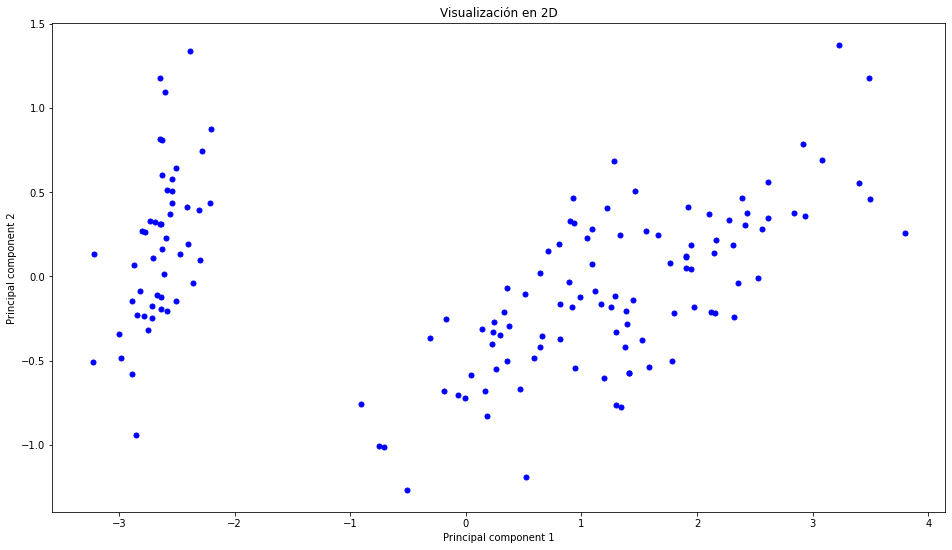

In [10]:
plt.figure(figsize = (16,9))

plt.scatter(df_principal['pc1'], df_principal['pc2'], c = "blue", marker = '.', s = 100 )

plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")


plt.title("Visualización en 2D")

plt.show()

## Ejercicio 1 C: Construye un modelo de clasificación lineal. Evalúa las métricas más importantes. Crea una visualización para la matriz de confusión

In [11]:
X = np.array(df)
y = np.array(target.values.ravel()) # Para transformar el vector columna a las dimensiones adecuadas de numpy

In [12]:
from sklearn.model_selection import ShuffleSplit
sss = ShuffleSplit(n_splits=1, test_size=0.2)


sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y)) 

X_train, X_test = X[train_index], X[test_index] 
y_train, y_test = y[train_index], y[test_index]

In [13]:
from sklearn.linear_model import Perceptron

clf = Perceptron()  # Podría haber usado ElasticNet()
clf.fit(X_train, y_train)

y_predictions = clf.predict(X_test)

In [14]:
sklearn.metrics.confusion_matrix(y_test, y_predictions)

array([[11,  0,  0],
       [ 1,  0,  9],
       [ 0,  0,  9]], dtype=int64)

C:\Users\norio\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


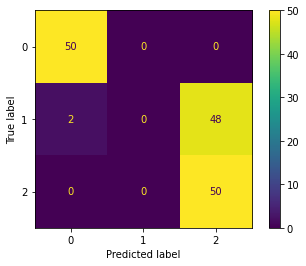

In [15]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X, y)  
plt.show()

## Ejercicio 1 D: ¿Cómo podrías visualizar las regiones de decisión del modelo anterior?

__Nota: La región de decisión de un modelo de clasificación consiste en los puntos del plano que se identifican con cada una de las categorías__ 

In [16]:
def mostrar_PCA(clases, tipo_registro):
    plt.figure(figsize = (16,9))

    plt.scatter(clases[0]['pc1'], clases[0]['pc2'], c = "blue", marker = '.', s = 300, label = "Clase 0" )
    plt.scatter(clases[1]['pc1'], clases[1]['pc2'], c = "red", marker = '.', s = 300, label = "Clase 1" )
    plt.scatter(clases[2]['pc1'], clases[2]['pc2'], c = "green", marker = '.', s = 300, label = "Clase 2" )

    plt.xlabel("Principal component 1")
    plt.ylabel("Principal component 2")

    plt.legend()
    plt.title("Visualización en 2D de " + tipo_registro)

    plt.show()

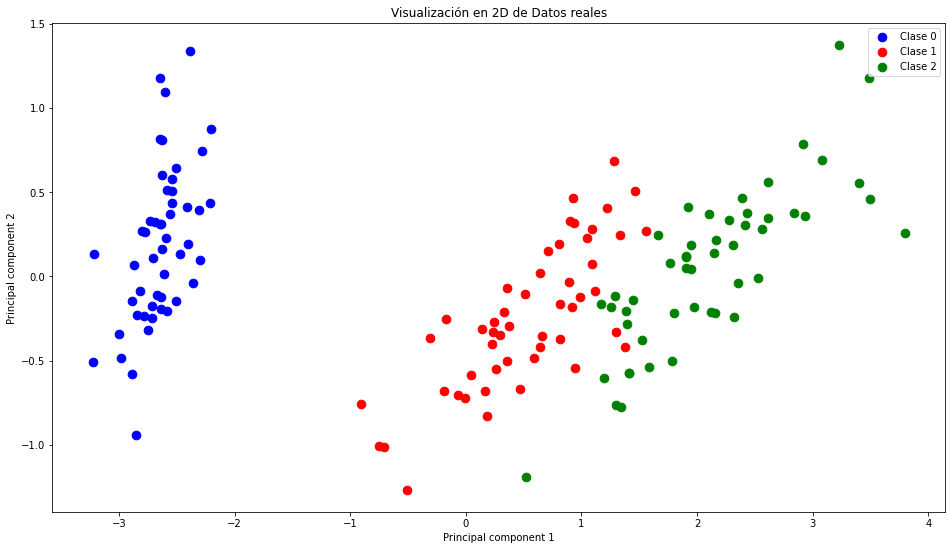

In [17]:
pc_reales =[]
pc_reales.append(df_principal[target['class']==0])
pc_reales.append(df_principal[target['class']==1])
pc_reales.append(df_principal[target['class']==2])
mostrar_PCA(pc_reales, "Datos reales")

In [18]:
predicted_targets = pd.DataFrame({'pred_class':target.iloc[test_index,:].values.ravel(), 'pc1':df_principal.iloc[test_index,0].values.ravel(), 'pc2':df_principal.iloc[test_index,1].values.ravel() })
predicted_targets.head()

,pred_class,pc1,pc2
0,0,-2.199820,0.872839
1,1,0.890815,-0.034464
2,1,-0.173925,-0.254854
3,2,1.922268,0.409203
4,2,1.415236,-0.574916


In [19]:
pc_predicted = []
pc_predicted.append(predicted_targets[predicted_targets['pred_class']==0])
pc_predicted.append(predicted_targets[predicted_targets['pred_class']==1])
pc_predicted.append(predicted_targets[predicted_targets['pred_class']==2])

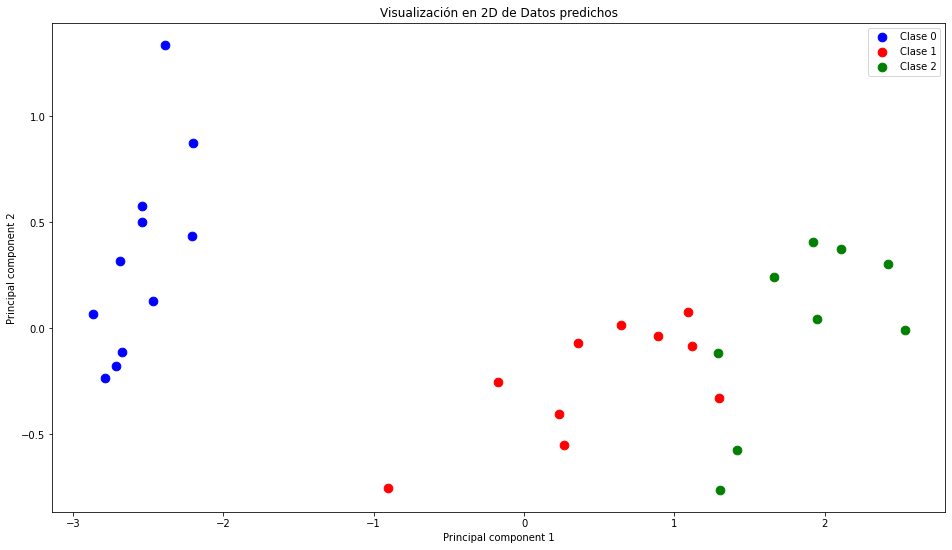

In [20]:
mostrar_PCA(pc_predicted, "Datos predichos")

## Ejercicio 2 A: Descarga y lee el dataset contenido en el siguiente enlace. https://www.kaggle.com/camnugent/california-housing-prices

In [22]:
df = pd.read_csv("housing.csv")
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


## Ejercicio 2 B: Realiza un análisis exploratorio de los datos con los siguientes objetivos:

* Indica si hay o no valores desconocidos
* Realiza una visualización de la matriz de correlaciones
* Visualiza la relación que existe entre la proximidad al con el precio mediano de la casa. ¿Indica que tipo de visualización quieres utilizar y por qué?
* ¿ Cómo afecta el número total de dormitorios al precio mediano de la casa ? Crea una gráfica que muestre la relación entre ambas variables

In [23]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

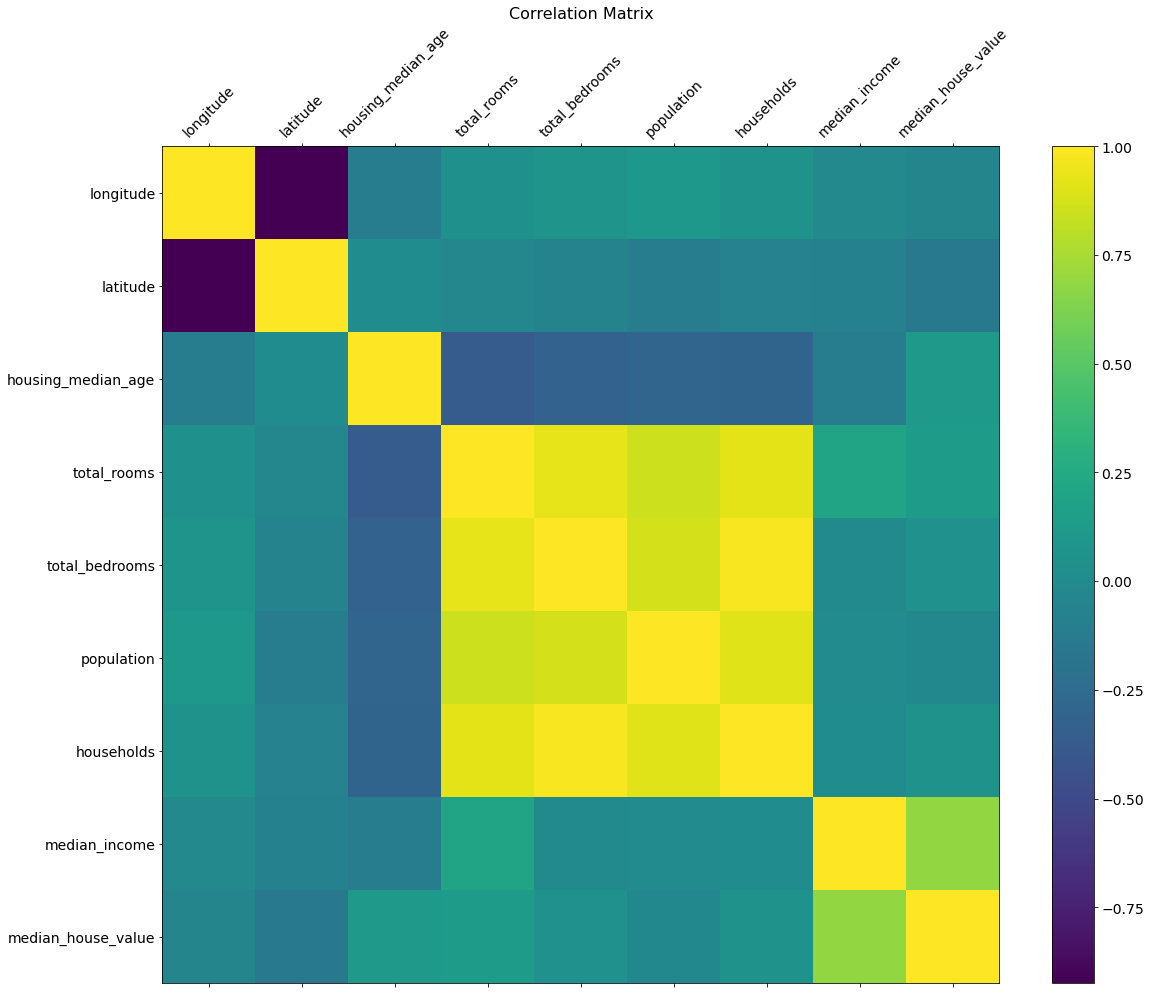

In [24]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Ejercicio 2 C: Construye un modelo de regresión usando árboles para predecir el precio mediano de la casa. ¿Cuáles son las variables más importantes del modelo? Monta una gráfica que lo muestre.

In [25]:
df.drop('median_house_value', axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [26]:
df = df.dropna().copy()

In [27]:
X = np.array(df.drop(['median_house_value', 'ocean_proximity'], axis=1))
y = np.array(df['median_house_value'].values.ravel()) # Para transformar el vector columna a las dimensiones adecuadas de numpy

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 123)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)
reg = tree.fit(X_train,y_train)

In [30]:
tree.feature_importances_

array([0.16971395, 0.15934709, 0.06124078, 0.02222433, 0.02704647,
       0.02953877, 0.01538943, 0.51549919])

In [31]:
predictions_train = tree.predict(X_train)
predictions = tree.predict(X_test)

In [1]:
cat = list(df.drop(['median_house_value', 'ocean_proximity'], axis=1).columns)
count = tree.feature_importances_

plt.figure(figsize= (14,8))

plt.bar(cat,count,color = "mediumseagreen",width = 0.3, align = "center")

plt.xlabel("Feature")
plt.ylabel("Gini importance")

plt.title("Normalized total reduction of the criterion brought by feature")

plt.show()

NameError: name 'df' is not defined

## Ejercicio 2 D: Evalúa el modelo anterior y saca las métricas más relevantes que consideres. ¿Qué interpretación puedes sacar del modelo anterior con todo lo recopilado?

Debería haber hecho train test split

In [33]:
# Metricas de evaluación
rmse_train = np.sqrt(mean_squared_error(y_train,predictions_train))
mae_train = mean_absolute_error(y_train, predictions_train)
mape_train = mean_absolute_percentage_error(y_train, predictions_train)

rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
mae_test = mean_absolute_error(y_test, predictions)
mape_test = mean_absolute_percentage_error(y_test, predictions)

print("El RMSE de train del modelo es: {}".format(rmse_train))
print(f"El MAE de train del modelo es: {mae_train}")
print(f"El MAPE de train del modelo es: {100 * mape_train} %")

print("")

print("El RMSE de test del modelo es: {}".format(rmse_test))
print(f"El MAE de test del modelo es: {mae_test}")
print(f"El MAPE de test del modelo es: {100*mape_test} %")

El RMSE de train del modelo es: 0.0
El MAE de train del modelo es: 0.0
El MAPE de train del modelo es: 0.0 %

El RMSE de test del modelo es: 69924.87889064092
El MAE de test del modelo es: 44526.418923327896
El MAPE de test del modelo es: 24.160354114218034 %


## Ejercicio 3 A: Descarga y lee el csv de https://www.kaggle.com/harrywang/wine-dataset-for-clustering 

In [67]:
df = pd.read_csv("wine-clustering.csv")
df.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [68]:
X = np.array(df)

## Ejercicio 3 B: Genera un modelo de clustering para agrupar los diferentes tipos de vinos

In [75]:
from sklearn.cluster import KMeans

In [76]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [77]:
label_pred = kmeans.labels_

## Ejercicio 3 C: Evalúa el modelo de clustering usando dos métricas distintas

In [78]:
sklearn.metrics.silhouette_score(X, label_pred)

0.6568536504294317

In [79]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

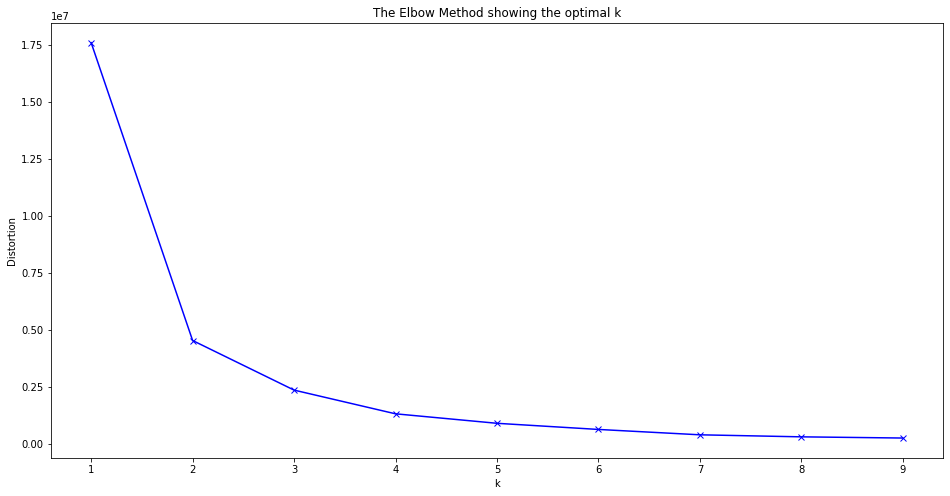

In [80]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Ejercicio 3 D: Visualiza, con técnicas de reducción de dimensión, cómo quedan distribuidos los clusters.

In [81]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
df_principal = pd.DataFrame(data = principal_components, columns = ['pc1', 'pc2'])

In [87]:
label_pred == 0

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

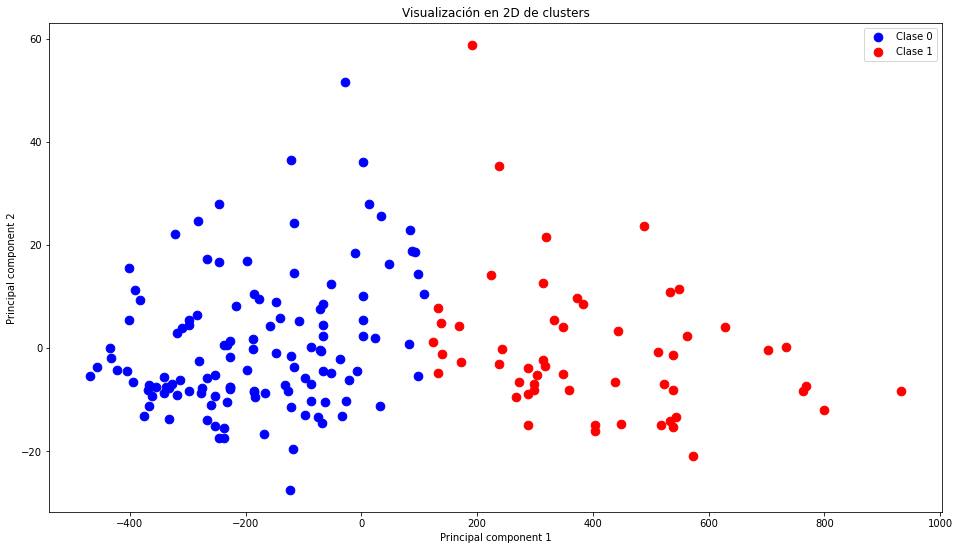

In [89]:
plt.figure(figsize = (16,9))

plt.scatter(df_principal[label_pred==0]['pc1'], df_principal[label_pred==0]['pc2'], c = "blue", marker = '.', s = 300, label = "Clase 0" )
plt.scatter(df_principal[label_pred==1]['pc1'], df_principal[label_pred==1]['pc2'], c = "red", marker = '.', s = 300, label = "Clase 1" )

plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")

plt.legend()
plt.title("Visualización en 2D de clusters")

plt.show()

## Ejercicio 3 E: Extrae, a partir de visualizaciones, 3 características que diferencien un cluster de otro.

In [94]:
columnas = list(df.columns)

In [93]:
def plotCaracteristica(car1, car2):
    #plt.figure(figsize = (16,9))

    plt.scatter(df[label_pred==0][car1], df[label_pred==0][car2], c = "blue", marker = '.', s = 300, label = "Clase 0" )
    plt.scatter(df[label_pred==1][car1], df[label_pred==1][car2], c = "red", marker = '.', s = 300, label = "Clase 1" )

    plt.xlabel(car1)
    plt.ylabel(car2)

    plt.legend()
    plt.title("Visualización en 2D de clusters")

    plt.show()

**Se muestran todas las columnas**

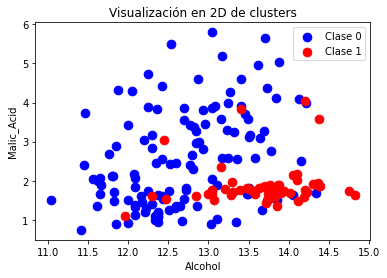

In [95]:
plotCaracteristica(columnas[0], columnas[1])

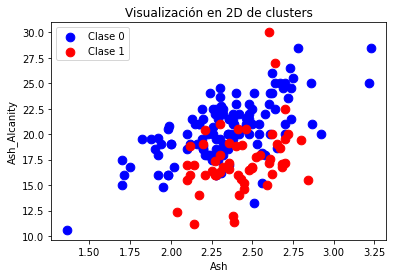

In [96]:
plotCaracteristica(columnas[2], columnas[3])

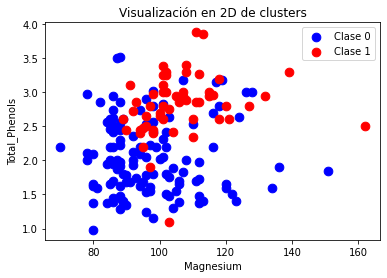

In [97]:
plotCaracteristica(columnas[4], columnas[5])

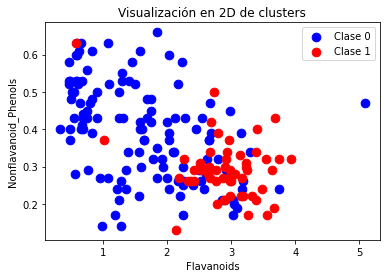

In [98]:
plotCaracteristica(columnas[6], columnas[7])

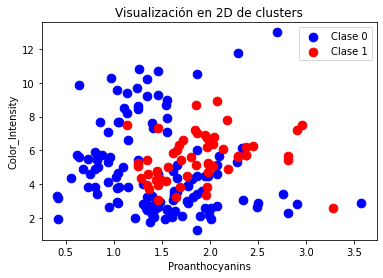

In [100]:
plotCaracteristica(columnas[8], columnas[9])

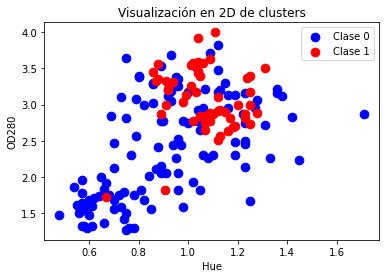

In [101]:
plotCaracteristica(columnas[10], columnas[11])

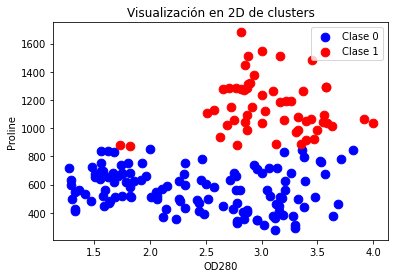

In [103]:
plotCaracteristica(columnas[11], columnas[12])

**Se escogen algunas que a ojo dividen muy bien**

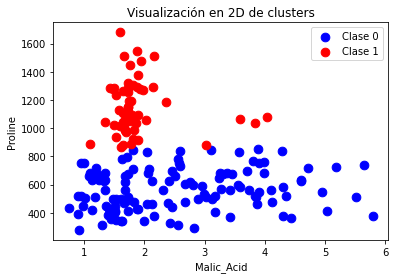

In [104]:
plotCaracteristica(columnas[1], columnas[12])

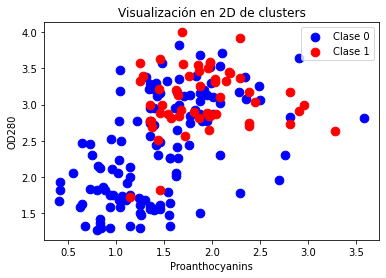

In [105]:
plotCaracteristica(columnas[8], columnas[11])

## Ejercicio 4 A: Descarga y lee el csv de Titanic de https://www.kaggle.com/cities/titanic123 (Puedes usar la librería Seaborn para leer este dataset sin necesidad de descargarlo)

In [121]:
titanic = sns.load_dataset('titanic')
#titanic = titanic.dropna().copy()
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [122]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [125]:
titanic.shape

(891, 15)

## Ejercicio 4 B: Realiza una gráfica para sacar la siguiente información:

* ¿Cuál es la distribución de las edades de las mujeres que fallecieron en el barco?
* ¿En qué proporción sobrevivieron los hombres, mujeres del barco?
* ¿El barco priorizó salvar alguna clase (primera, segunda o tercera) en particular?
* ¿Existe alguna franja de edad que se priorizara para salvarse?

__Justifica por qué usas estas visualizaciones y realízalo todo en una única gráfica__

In [127]:
edades_mujeres = titanic['age'][titanic['sex']=="female"].dropna()

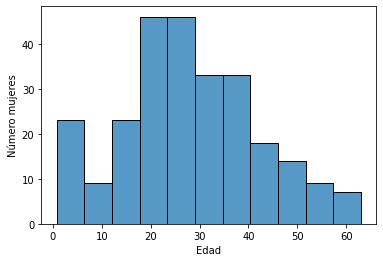

In [150]:
ax = sns.histplot(data = edades_mujeres)
ax.set(xlabel='Edad', ylabel='Número mujeres')
plt.show()

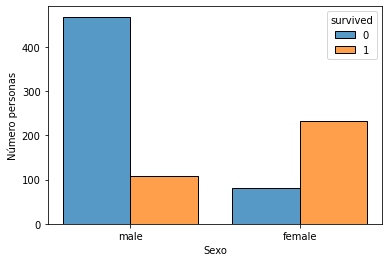

In [151]:
ax = sns.histplot(data = titanic, x="sex", hue = "survived", multiple="dodge", shrink = 0.8)
ax.set(xlabel='Sexo', ylabel='Número personas')
plt.show()

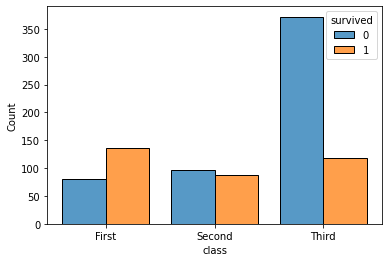

In [152]:
sns.histplot(data = titanic, x="class", hue = "survived", multiple="dodge", shrink = 0.8)
ax.set(xlabel='Clase', ylabel='Número personas')
plt.show()

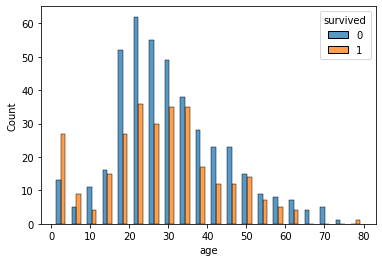

In [153]:
sns.histplot(data = titanic, x="age", hue = "survived", multiple="dodge", shrink = 0.6)
ax.set(xlabel='Edad', ylabel='Número personas')
plt.show()

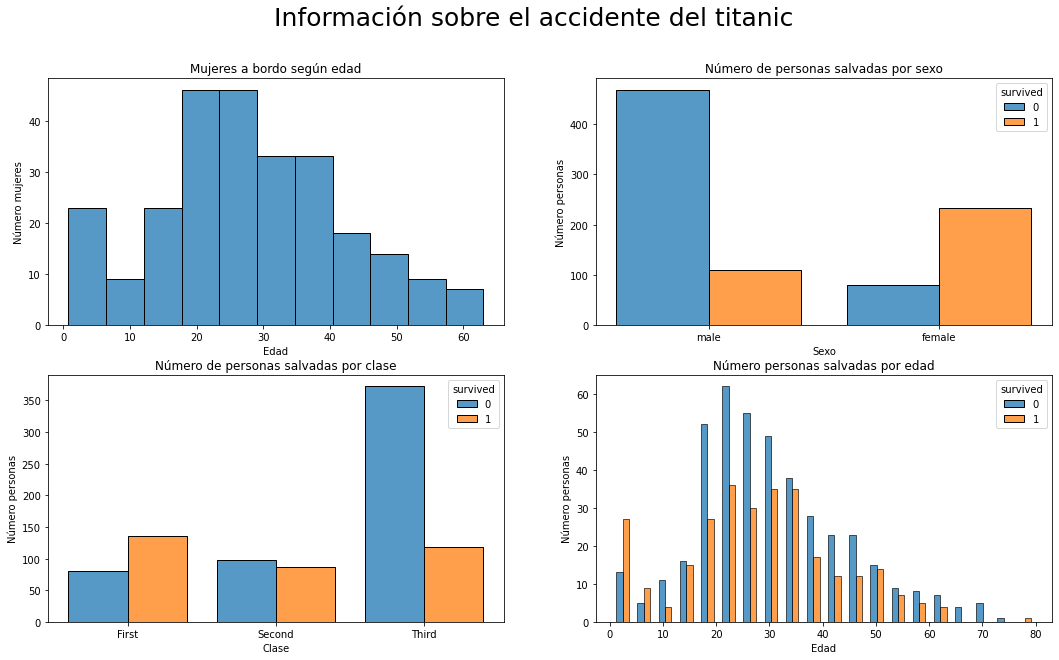

In [158]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Información sobre el accidente del titanic', fontsize = 25)

ax1 = sns.histplot(ax=axes[0, 0], data = edades_mujeres)
ax1.set(xlabel='Edad', ylabel='Número mujeres')
ax1.set_title("Mujeres a bordo según edad")

ax2 = sns.histplot(ax=axes[0, 1], data = titanic, x="sex", hue = "survived", multiple="dodge", shrink = 0.8)
ax2.set(xlabel='Sexo', ylabel='Número personas')
ax2.set_title("Número de personas salvadas por sexo")

ax3 = sns.histplot(ax=axes[1, 0], data = titanic, x="class", hue = "survived", multiple="dodge", shrink = 0.8)
ax3.set(xlabel='Clase', ylabel='Número personas')
ax3.set_title("Número de personas salvadas por clase")

ax4 = sns.histplot(ax=axes[1, 1], data = titanic, x="age", hue = "survived", multiple="dodge", shrink = 0.6)
ax4.set(xlabel='Edad', ylabel='Número personas')
ax4.set_title("Número personas salvadas por edad")

plt.show()

## Ejercicio 5 A: Define una clase llamada circulo que, dado un radio, tenga dos métodos uno que calcule el área y otro que calcule la longitud de la circunferencia.

In [ ]:
class circuloClase():
    
    def __init__(self,radio):
        self.radio = radio
    
    def area(self):
        area = np.pi*np.pi*self.radio
        return area
    
    def longitud(self):
        longitud = self.radio*2*np.pi
        return longitud
    
circulo = circuloClase(5)
print(f"El área del círculo es {circulo.area()}")
print(f"El perímetro del círculo es {circulo.longitud()}")

## Ejercicio 5 B: Define una clase llamada esfera que herede los métodos anteriores y sobreescriba el cálculo del área y realice el cálculo del volumen de la esfera

In [ ]:
# Existen clases que pueden ser construidas a partir de otras clases

class esferaClase(circuloClase):
    
    def __init__(self,radio):
        self.radio = radio
        super().__init__(self.radio)
        
    def area(self):
        area = 2*super().area()
        return area
    
    def volume(self):
        volume = 4/3 * np.pi * np.power(self.radio, 3)
        return volume

In [ ]:
esfera = esferaClase(5)
print(f"El área de la esfera es {esfera.area()}")
print(f"El volumen de la esfera es {esfera.volume()}")